In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
$

$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\At}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\lambda_i}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

$
\newcommand{\zerob}{\pmb{0}}
$


aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T  #2 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$

$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

$\newcommand{\betaf}[2]{\mathbf{B}(#1,#2)}$
$\newcommand{\betaab}{\betaf{\alpha}{\beta}}$

$f(x) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
x^{\alpha-1} (1-x)^{\beta-1}, 0 < x < 1$

This can be written as follows:

$$
\begin{align}
f(x; \alpha, \beta) & = constant . x^{\alpha-1} (1-x)^{\beta-1} \\
& = \frac{x^{\alpha-1} (1-x)^{\beta-1}}
         {\int_{0}^{1} u^{\alpha-1} (1-u)^{\beta-1} du} \\
& = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} 
x^{\alpha-1} (1-x)^{\beta-1} \\
& = \frac{1}{\betaab} x^{\alpha-1} (1-x)^{\beta-1}
\end{align}
$$

\begin{array}{lrl}
\Gamma(a) \Gamma(b)
&=
\int_{0}^{\infty} x^{a-1} e^{-x} ~dx
\int_{0}^{\infty} y^{a-1} e^{-y} ~dy
\\ &=
\int_{0}^{\infty} x^{a-1} 
\left(
  \int_{0}^{\infty} y^{a-1} e^{-x-y} ~dy
\right) ~dx
\end{array}

# Deriving the constant  

$$
t = x+y \\ dt = dy \\
y:[0 \rightarrow \infty] \Rightarrow t:[x \rightarrow \infty]
$$

\begin{array}{lrl}
\Gamma(a) \Gamma(b) 
&=
\int_{0}^{\infty} x^{a-1}
\left\{
  \int_{x}^{\infty} (t-x)^{a-1} e^{-t} ~dt
\right\} ~dx
\\ &=
\int_{0}^{\infty} e^{-t}
\left\{
  \int_{0}^{t} x^{a-1} (t-x)^{a-1}  ~dx
\right\} ~dt
\end{array}

$$
x = t \mu \\
dx = t d\mu \\
x:[0 \rightarrow t] \Rightarrow t\mu: [0 \rightarrow 1]
$$

\begin{array}{lll}
\Gamma(a) \Gamma(b)
&=
\int_{0}^{\infty} e^{-t}
\left\{
  \int_{0}^{1} t^{a-1} ~\mu^{a-1} ~t^{a-1} ~(1-\mu)^{a-1} ~t ~d\mu
\right\} ~dt
\\ &=
\int_{0}^{\infty} e^{-t} t^{a-1} ~t^{a-1} ~t ~dt
~\left\{
  \int_{0}^{1} ~\mu^{a-1} ~(1-\mu)^{a-1} ~d\mu
\right\}
\\ &=
\int_{0}^{\infty} e^{-t} t^{a+b-1} ~dt
~\int_{0}^{1} ~\mu^{a-1} ~(1-\mu)^{a-1} ~d\mu
\\ &=
\Gamma(a+b) ~\int_{0}^{1} ~\mu^{a-1} ~(1-\mu)^{a-1} ~d\mu
\\
\int_{0}^{1} ~\mu^{a-1} ~(1-\mu)^{a-1} ~d\mu &=
\frac
{\Gamma(a) \Gamma(b)}
{\Gamma(a+b)}
\end{array}


Here **B(.)** is the quite interesting [beta function](https://en.wikipedia.org/wiki/Beta_distribution?oldformat=true) which given by 
$$
\betaab = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
$$

Gamma function is given by 
\begin{array}{ll}
\Gamma(x) &= \int_{0}^{\infty} u^{x-1} e^{-u} du \\
\Gamma(x) &= (x-1) ~\Gamma(x-1)\\
\end{array}

Since
\begin{array}{llr}
\frac{1}{\betaab} \int_{0}^{1} x^{\alpha-1}(1-x)^{\beta-1} dx = 1\\
\text{we have },\\
\betaab = \int_{0}^{1} x^{\alpha-1}(1-x)^{\beta-1} dx
\end{array}
[Note: Its the other way around. But this makes it easy to understand/remember]

# Statistics

## E[X]

\begin{array}{llr}
\E{X}
&= \frac{1}{\betaab} \int_{0}^{1} x ~ x^{\alpha-1} ~(1-x)^{\beta-1} ~dx
\\
&=
\frac{1}{\betaab} \int_{0}^{1} x^{\alpha} ~(1-x)^{\beta-1} ~dx
\\
&=
\frac{1}{\betaab} \betaf{\alpha+1}{\beta} \\
&=
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
\frac{\Gamma(\alpha+1)\Gamma(\beta)}{\Gamma(\alpha+\beta+1)}
\\
&=
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha+\beta+1)}
\frac{\Gamma(\alpha+1)}{\Gamma(\alpha)}
\\
&=
\frac{\alpha}{\alpha+\beta}
\end{array}

## E[X^2]
\begin{array}{llr}
\E{X^2}
&=
\frac{1}{\betaab} \int_{0}^{1} x^{\alpha+1} ~(1-x)^{\beta-1} ~dx
\\
&=
\frac{1}{\betaab} \betaf{\alpha+2}{\beta}
\\
&=
\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha+\beta+2)}
\frac{\Gamma(\alpha+2)}{\Gamma(\alpha)}
\\
&=
\frac{(\alpha+1)\alpha}{(\alpha+\beta+1)(\alpha+\beta)}
\end{array}

## Var

\begin{array}{llr}
\V{X}
&=
\frac{(\alpha+1)\alpha}{(\alpha+\beta+1)(\alpha+\beta)}
-
\left(\frac{\alpha}{\alpha+\beta}\right)^2
\\
&=
\frac
{\alpha(\alpha+1)(\alpha+\beta) - \alpha^2(\alpha+\beta+1)}
{(\alpha+\beta+1)(\alpha+\beta)^2}
\\
&=
\frac
{\alpha\beta}
{(\alpha+\beta+1)(\alpha+\beta)^2}
\end{array}

# Uses

* Conjugate prior for binomial
* The beta distribution has been applied to model the behavior of random variables 
limited to intervals of finite length in a wide variety of disciplines.
For example, it has been used as a statistical description of 
  * allele frequencies in population genetics;[1] 
  * time allocation in project management / control systems;[2] 
  * sunshine data;[3] 
  * variability of soil properties;[4] 
  * proportions of the minerals in rocks in stratigraphy;[5]
  * heterogeneity in the probability of HIV transmission.[6]

/Users/dragon/Library/Python/3.6/lib/python/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


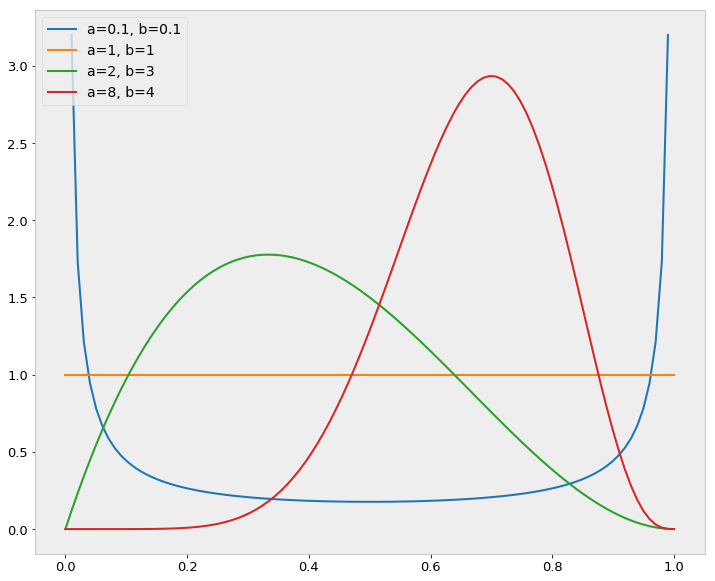

<function __main__.interact_beta>

In [2]:
def compute_beta(x, a, b):
    return (math.gamma(a+b)/(math.gamma(a)*math.gamma(b))) * (x**(a-1)) * ((1-x)**(b-1))

def show_beta(alpha, beta):
    x = np.linspace(0, 1, 100)
    y = [compute_beta(xx, alpha, beta) for xx in x]
    plt.plot(x, y, label='a={0}, b={1}'.format(alpha,beta))
    
    
def interact_beta(alpha=2,beta=3,show_all=True):
    params = [[0.1,0.1],[1,1],[2,3],[8,4]]
    [show_beta(param[0],param[1]) for param in params] if show_all else show_beta(alpha,beta)
    plt.legend(loc='upper left')
    plt.grid();plt.show()
    
interact(interact_beta, alpha=(0.5,100,0.5), beta=(0.5,100,.5))